<a href="https://colab.research.google.com/github/Kiarendil/ML_FIAN2020_hometasks/blob/master/Copy_of_MLatFIAN2020_seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

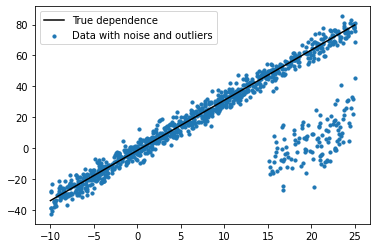

In [37]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-10., 25.)

def generate_dataset(N=1000):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [38]:
from tqdm import trange, tqdm

In [39]:
# loss = abs(y - X_expanded @ w).mean()

$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|$ = `abs(y - X_expanded @ w).mean()`

$ \frac{\partial |\vec{y} - X \cdot \vec{w}|}{\partial\vec{w}} = X^T\cdot\text{sign}(\vec{y} - X' \cdot \vec{w})$ 

100%|██████████| 20000/20000 [00:01<00:00, 16803.38it/s]


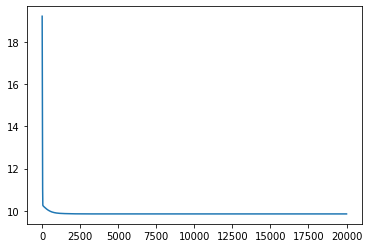

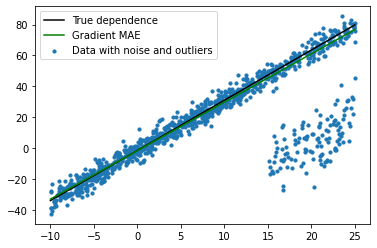

In [53]:
X_expanded = np.concatenate([
    X, np.ones(shape=(len(X), 1))], axis=1)

w = np.ones(dtype=float, shape=X_expanded.shape[1])

loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.01

# Training loop
for _ in trange(20000):
  # Your turn: calculate the gradient of MAE  with respect to w:
  gradient = X_expanded.T @ np.sign(X_expanded @ w - y) / len(X_expanded) 

  # Automatic checks
  assert gradient.shape == w.shape
  assert (
      abs(y - X_expanded @ w).mean() > 
      abs(y - X_expanded @ (w - 1.e-8 * gradient)).mean()
  )

  # Gradient descent step
  w -= learning_rate * gradient

  # Calculate and record the new loss value
  loss_values.append(
      abs(X_expanded @ w - y).mean()
  )

# Plotting the evolution of loss values
plt.plot(loss_values);
plt.show()

# Plotting the solution
x_expanded = np.concatenate([
    x[:,None], np.ones(shape=(len(x), 1))
], axis=1)

plt.plot(x, true_function(x), c='black', label='True dependence')
plt.plot(x, x_expanded @ w, c='green', label='Gradient MAE')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

[2.3523739] -1.87555844399537


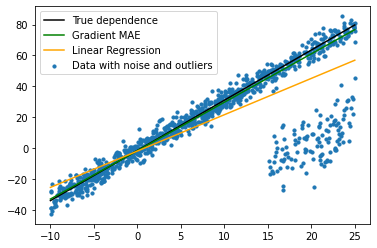

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

plt.plot(x, true_function(x), c='black', label='True dependence')
plt.plot(x, x_expanded @ w, c='green', label='Gradient MAE')
plt.plot(x, model.predict(x[:,None]), c='orange', label='Linear Regression')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

print(model.coef_, model.intercept_)

Our gradient decent uses MAE which allows us "to ignore" the noise, it tends to "median" value. 
The `sklearn's LinearRegression` uses MSE which squares the error so it is more influence to the noise and tends to mean value. 

Below provided MSE gradient which gives the same result as `LinearRegression`

100%|██████████| 50000/50000 [00:03<00:00, 16301.65it/s]


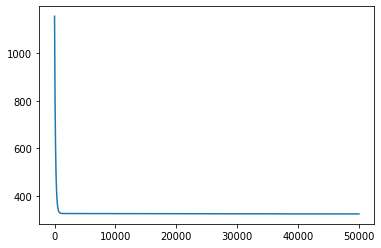

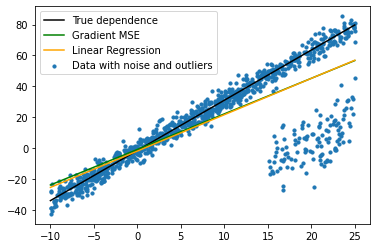

In [65]:
X_expanded = np.concatenate([
    X, np.ones(shape=(len(X), 1))], axis=1)

# Initialize the model parameters with zeros
w = np.zeros(dtype=float, shape=X_expanded.shape[1])

loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.00001

# Training loop
for _ in trange(50000):
  # Your turn: calculate the gradient of MSE with respect to w:
  gradient = 2*X_expanded.T @ (X_expanded @ w - y)/ len(X_expanded)

  # Automatic checks
  assert gradient.shape == w.shape
  assert (
      ((X_expanded @ w - y)**2).mean() > 
      ((X_expanded @ (w - 1.e-10 * gradient) - y)**2).mean()
  )

  # Gradient descent step
  w -= learning_rate * gradient

  # Calculate and record the new loss value
  loss_values.append(
      ((X_expanded @ w - y)**2).mean()
  )

# Plotting the evolution of loss values
plt.plot(loss_values);
plt.show()

# Plotting the solution
x_expanded = np.concatenate([
    x[:,None], np.ones(shape=(len(x), 1))
], axis=1)

plt.plot(x, true_function(x), c='black', label='True dependence')
plt.plot(x, x_expanded @ w, c='green', label='Gradient MSE')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.plot(x, model.predict(x[:,None]), c='orange', label='Linear Regression')
plt.legend();